In [2]:
import time
import math, os, sys

from coffea.nanoevents import BaseSchema

import awkward as ak
import numpy as np
from coffea import processor

from hist import Hist

from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)

import matplotlib.pyplot as plt
from plotter import create_plot1d, create_plot2d
from utils import *

In [3]:
muon_cols = ['Muon_charge', 'Muon_dxy', 'Muon_dxyErr', 'Muon_dz', 'Muon_dzErr', 'Muon_eta', 'Muon_isGlobal', 'Muon_mass',
             'Muon_phi', 'Muon_pt', 'Muon_ptErr', 'Muon_softId', 'Muon_vtxIdx', 'Muon_vtxFlag', 'Muon_simIdx', 'Muon_x',
             'Muon_y', 'Muon_z',]

dimu_cols = ['Dimu_pt', 'Dimu_eta', 'Dimu_phi', 'Dimu_rap', 'Dimu_mass', 'Dimu_charge', 'Dimu_vtxIdx', 'Dimu_chi2', 'Dimu_dl', 
             'Dimu_dlErr', 'Dimu_dlSig', 'Dimu_cosphi', 'Dimu_x', 'Dimu_y', 'Dimu_z', 'Dimu_t1muIdx', 'Dimu_t2muIdx',]

dimu_cols_cov = ['Dimu_Covxx',	'Dimu_Covyx', 'Dimu_Covyy', 'Dimu_Covzx', 'Dimu_Covzy', 'Dimu_Covzz', 'Dimu_pt', 'Dimu_eta', 
                 'Dimu_phi', 'Dimu_rap', 'Dimu_mass', 'Dimu_charge', 'Dimu_vtxIdx', 'Dimu_chi2', 'Dimu_dl', 'Dimu_dlErr', 
                 'Dimu_dlSig', 'Dimu_cosphi', 'Dimu_x', 'Dimu_y', 'Dimu_z', 'Dimu_t1muIdx', 'Dimu_t2muIdx',]

d0_cols = ['D0_pt', 'D0_eta', 'D0_phi', 'D0_rap', 'D0_mass12', 'D0_mass21', 'D0_vtxIdx', 'D0_chi2', 'D0_dl', 'D0_dlErr', 
           'D0_dlSig', 'D0_cosphi', 'D0_x', 'D0_y', 'D0_z', 'D0_hasMuon', 
           'D0_t1pt', 'D0_t1eta', 'D0_t1phi', 'D0_t1chindof', 'D0_t1nValid', 'D0_t1nPix', 'D0_t1dxy', 'D0_t1dz', 'D0_t1chg', 
           'D0_t2pt', 'D0_t2eta', 'D0_t2phi', 'D0_t2chindof', 'D0_t2nValid', 'D0_t2nPix', 'D0_t2dxy', 'D0_t2dz', 'D0_t2chg',]

d0_cols_cov = ['D0_Covxx', 'D0_Covyx', 'D0_Covyy', 'D0_Covzx', 'D0_Covzy', 'D0_Covzz', 'D0_pt', 'D0_eta', 'D0_phi', 'D0_rap', 
               'D0_mass12', 'D0_mass21', 'D0_vtxIdx', 'D0_chi2', 'D0_dl', 'D0_dlErr', 'D0_dlSig', 'D0_cosphi', 'D0_x', 'D0_y', 
               'D0_z', 'D0_hasMuon',
               'D0_t1pt', 'D0_t1eta', 'D0_t1phi', 'D0_t1chindof', 'D0_t1nValid', 'D0_t1nPix', 'D0_t1dxy', 'D0_t1dz', 'D0_t1chg', 
               'D0_t2pt', 'D0_t2eta', 'D0_t2phi', 'D0_t2chindof', 'D0_t2nValid', 'D0_t2nPix', 'D0_t2dxy', 'D0_t2dz', 'D0_t2chg',]

dstar_cols = ['Dstar_pt', 'Dstar_eta', 'Dstar_phi', 'Dstar_rap', 'Dstar_deltam', 'Dstar_deltamr', 'Dstar_vtxIdx', 'Dstar_hasMuon',
              'Dstar_D0pt', 'Dstar_D0eta', 'Dstar_D0phi', 'Dstar_D0mass', 'Dstar_D0chi2', 'Dstar_D0dl', 'Dstar_D0dlErr',
              'Dstar_D0dlSig', 'Dstar_D0cosphi', 'Dstar_D0x', 'Dstar_D0y', 'Dstar_D0z', 'Dstar_D0recIdx',
              'Dstar_Kpt', 'Dstar_Keta', 'Dstar_Kphi', 'Dstar_KvtxIdx', 'Dstar_Kchindof', 'Dstar_KnValid', 'Dstar_KnPix', 
              'Dstar_Kdxy', 'Dstar_Kdz', 'Dstar_Kchg',
              'Dstar_pipt', 'Dstar_pieta', 'Dstar_piphi', 'Dstar_pivtxIdx', 'Dstar_pichindof', 'Dstar_pinValid', 'Dstar_pinPix',
              'Dstar_pidxy', 'Dstar_pidz', 'Dstar_pichg',
              'Dstar_pispt', 'Dstar_piseta', 'Dstar_pisphi', 'Dstar_pisvtxIdx', 'Dstar_pischindof', 'Dstar_pisnValid', 'Dstar_pisnPix',
              'Dstar_pisdxy', 'Dstar_pisdz', 'Dstar_simIdx', 'Dstar_D0simIdx', 'Dstar_pischg',]

gen_part_cols = ['GenPart_eta', 'GenPart_genPartIdxMother', 'GenPart_mass', 'GenPart_pdgId', "GenPart_phi", "GenPart_pt", 
                 'GenPart_status', 'GenPart_Id', 'GenPart_parpdgId', 'GenPart_sparpdgId', 'GenPart_numberOfDaughters', 
                 'GenPart_nstchgdaug', 'GenPart_vx', 'GenPart_vy', 'GenPart_vz', 'GenPart_mvx', 'GenPart_mvy', 'GenPart_mvz', 
                 'GenPart_recIdx',]

pvtx_cols = ['PVtx_Covxx',	'PVtx_Covyx', 'PVtx_Covyy', 'PVtx_Covzx', 'PVtx_Covzy', 'PVtx_Covzz', 'PVtx_isGood', 'PVtx_x', 
             'PVtx_y', 'PVtx_z', 'PVtx_Id', 'PVtx_sumPt', 'PVtx_ntrk',]

hlt_cols = {'2016': ['HLT_Dimuon13_Upsilon', 'HLT_Dimuon8_Upsilon_Barrel'],
            '2017': ['HLT_Dimuon10_Upsilon_Barrel_Seagulls', 'HLT_Dimuon12_Upsilon_eta1p5', 'HLT_Dimuon24_Upsilon_noCorrL1'],
            '2018': ['HLT_Dimuon10_Upsilon_Barrel_Seagulls', 'HLT_Dimuon12_Upsilon_eta1p5', 'HLT_Dimuon12_Upsilon_y1p4',
                     'HLT_Dimuon24_Upsilon_noCorrL1']}

D0_PDG_MASS = 1.864

def fill_hists(hists, cand, get_deltam=False):
    hists['pt'].fill(pt=ak.flatten(cand.pt))
    hists['eta'].fill(eta=ak.flatten(cand.eta))
    hists['phi'].fill(phi=ak.flatten(cand.phi))
    if get_deltam:
        if 'Gen' in hists['deltam'].axes[0].label:
            hists['deltam'].fill(deltam=np.repeat(0.145, len(ak.flatten(cand))))
        else:
            hists['deltam'].fill(deltam=ak.flatten(cand.deltam))
    else:
        hists['mass'].fill(mass=ak.flatten(cand.mass))

def fill_associated(hists, cand):
    from coffea.nanoevents.methods import candidate
    ak.behavior.update(candidate.behavior)
    
    cand1 = ak.zip({
            'pt': cand.slot0.pt,
            'eta': cand.slot0.eta,
            'phi': cand.slot0.phi,
            'mass': cand.slot0.mass,}, with_name="PtEtaPhiMLorentzVector")

    cand2 = ak.zip({
            'pt': cand.slot1.pt,
            'eta': cand.slot1.eta,
            'phi': cand.slot1.phi,
            'mass': cand.slot1.mass,}, with_name="PtEtaPhiMLorentzVector")

    if 'Reco' in hists['pt'].axes[0].label:
        cand['deltarap'] = cand.slot0.rap - cand.slot1.rap
    else:
        rap0 = np.log((np.sqrt(cand1.mass**2 + cand1.pt**2*np.cosh(cand1.eta)**2) + cand1.pt*np.sinh(cand1.eta))/np.sqrt(cand1.mass**2 + cand1.pt**2))
        rap1 = np.log((np.sqrt(cand2.mass**2 + cand2.pt**2*np.cosh(cand2.eta)**2) + cand2.pt*np.sinh(cand2.eta))/np.sqrt(cand2.mass**2 + cand2.pt**2))
        cand['deltarap'] = rap0 - rap1
    cand['deltapt'] = cand.slot0.pt - cand.slot1.pt
    cand['deltaeta'] = cand.slot0.eta - cand.slot1.eta
    cand['deltaphi'] = cand.slot0.phi - cand.slot1.phi
    cand['cand'] = cand1 + cand2

    hists['pt'].fill(pt=ak.flatten(cand['cand'].pt))
    hists['eta'].fill(eta=ak.flatten(cand['cand'].eta))
    hists['phi'].fill(phi=ak.flatten(cand['cand'].phi))
    hists['mass'].fill(mass=ak.flatten(cand['cand'].mass))
    hists['deltapt'].fill(deltapt=ak.flatten(cand['deltapt']))
    hists['deltaeta'].fill(deltaeta=ak.flatten(cand['deltaeta']))
    hists['deltarap'].fill(deltarap=ak.flatten(cand['deltarap']))
    hists['deltaphi'].fill(deltaphi=ak.flatten(cand['deltaphi']))
    

def get_n_dimu_dstar(dimu, dstar):
    Dimu_Dstar = ak.cartesian([dimu, dstar])
    Dimu_Dstar = Dimu_Dstar[Dimu_Dstar.slot0.vtxIdx == Dimu_Dstar.slot1.vtxIdx]
    return ak.num(Dimu_Dstar)

In [10]:
""" paths = ['/eos/user/k/kmotaama/CRAB_UserFiles/UpsilonToMuMuDstarToD0pi/220120_145243/0000',
         '/eos/user/k/kmotaama/CRAB_UserFiles/UpsilonToMuMuDstarToD0pi/220120_145243/0001'] """
""" paths = ['/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0pi/220131_135742/0000',
         '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0pi/220131_135742/0001'] """
""" paths = [
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTrigger/220410_232000/0000',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTrigger/220410_232000/0001',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTrigger/220410_232000/0002',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTrigger/220410_232000/0003',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTrigger/220410_232000/0004',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTrigger/220410_232000/0005',
] """

paths = [
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTriggerEta14/220410_232046/0000',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTriggerEta14/220410_232046/0001',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTriggerEta14/220410_232046/0002',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTriggerEta14/220410_232046/0003',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTriggerEta14/220410_232046/0004',
    '/Users/kevimota/cernbox/CRAB_UserFiles/UpsilonToMuMuDstarToD0piTriggerEta14/220410_232046/0005',
]

files = get_root_files(paths)

In [11]:
class MCProcessor(processor.ProcessorABC):
    def __init__(self, evt_display=False):
        Gen_Upsilon_hists = processor.dict_accumulator({
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Gen \Upsilon}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -4, 4, name="eta", label=r"$\eta_{Gen \Upsilon}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Gen \Upsilon}$").Double(),
            'mass': Hist.new.Regular(100, 8.6, 11, name="mass", label=r"$m_{Gen \Upsilon}$ [GeV]").Double(),
        })

        Gen_Muon_lead_hists = processor.dict_accumulator({
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Gen \mu}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -2.5, 2.5, name="eta", label=r"$\eta_{Gen \mu}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Gen \mu}$").Double(),
            'mass': Hist.new.Regular(100, 0, 1, name="mass", label=r"$m_{Gen \mu}$ [GeV]").Double(),
        })

        Gen_Muon_trail_hists = processor.dict_accumulator({
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Gen \mu}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -2.5, 2.5, name="eta", label=r"$\eta_{Gen \mu}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Gen \mu}$").Double(),
            'mass': Hist.new.Regular(100, 0, 1, name="mass", label=r"$m_{Gen \mu}$ [GeV]").Double(),
        })

        Gen_Dstar_hists = {
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Gen D^*}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -4, 4, name="eta", label=r"$\eta_{Gen D^*}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Gen D^*}$").Double(),
            'deltam': Hist.new.Regular(50, 0.138, 0.162, name="deltam", label=r"$\Delta m_{Gen D^*}$ [GeV]").Double(),
        }

        Gen_D0_hists = {
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Gen D_0}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -5, 5, name="eta", label=r"$\eta_{Gen D_0}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Gen D_0}$").Double(),
            'mass': Hist.new.Regular(100, 1.7, 2.0, name="mass", label=r"$m_{Gen D_0}$ [GeV]").Double(),
        }

        Gen_Associated_hists = processor.dict_accumulator({
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Gen \Upsilon D^*}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -4, 4, name="eta", label=r"$\eta_{Gen \Upsilon D^*}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Gen \Upsilon D^*}$").Double(),
            'mass': Hist.new.Regular(100, 8.6, 50, name="mass", label=r"$m_{Gen \Upsilon D^*}$ [GeV]").Double(),
            'deltapt': Hist.new.Regular(100, -30, 60, name='deltapt', label=r"$\Delta p_{T,Gen \Upsilon D^*}$ [GeV]").Double(),
            'deltaeta': Hist.new.Regular(60, -8, 8, name="deltaeta", label=r"$\Delta \eta_{Gen \Upsilon D^*}$").Double(),
            'deltarap': Hist.new.Regular(60, -8, 8, name="deltarap", label=r"$\Delta y_{Gen \Upsilon D^*}$").Double(),
            'deltaphi': Hist.new.Regular(60, -2*math.pi, 2*math.pi, name="deltaphi", label=r"$\Delta \phi_{Gen \Upsilon D^*}$").Double(),
        })

        Event_info = processor.dict_accumulator({
            'n_evt': Hist.new.Regular(1000, -0.5, 999.5, name='n_evt', label=r"Number of Events").Int64(),
            'n_gen_upsilon': Hist.new.Regular(1000, -0.5, 999.5, name='n_gen_upsilon', label=r"Number of Gen Upsilon").Int64(),
            'n_gen_dstar': Hist.new.Regular(1000, -0.5, 999.5, name='n_gen_dstar', label=r"Number of Gen Dstar").Int64(),
            'n_gen_associated': Hist.new.Regular(1000, -0.5, 999.5, name='n_gen_associated', label=r"Number of Associated").Int64(),
        })

        Reco_Upsilon_hists = processor.dict_accumulator({
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Reco \Upsilon}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -4, 4, name="eta", label=r"$\eta_{Reco \Upsilon}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Reco \Upsilon}$").Double(),
            'mass': Hist.new.Regular(100, 8.6, 11, name="mass", label=r"$m_{Reco \Upsilon}$ [GeV]").Double(),
        })

        Reco_Muon_lead_hists = processor.dict_accumulator({
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Reco \mu}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -2.5, 2.5, name="eta", label=r"$\eta_{Reco \mu}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Reco \mu}$").Double(),
            'mass': Hist.new.Regular(100, 0, 1, name="mass", label=r"$m_{Reco \mu}$ [GeV]").Double(),
        })

        Reco_Muon_trail_hists = processor.dict_accumulator({
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Reco \mu}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -2.5, 2.5, name="eta", label=r"$\eta_{Reco \mu}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Reco \mu}$").Double(),
            'mass': Hist.new.Regular(100, 0, 1, name="mass", label=r"$m_{Reco \mu}$ [GeV]").Double(),
        })

        Reco_Dstar_hists = {
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Reco D^*}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -4, 4, name="eta", label=r"$\eta_{Reco D^*}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Reco D^*}$").Double(),
            'deltam': Hist.new.Regular(50, 0.138, 0.162, name="deltam", label=r"$\Delta m_{Reco D^*}$ [GeV]").Double(),
        }

        Reco_D0_hists = {
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Reco D_0}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -5, 5, name="eta", label=r"$\eta_{Reco D_0}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Reco D_0}$").Double(),
            'mass': Hist.new.Regular(100, 1.7, 2.0, name="mass", label=r"$m_{Reco D_0}$ [GeV]").Double(),
        }

        Reco_Associated_hists = processor.dict_accumulator({
            'pt': Hist.new.Regular(100, 0, 100, name='pt', label=r"$p_{T,Reco \Upsilon D^*}$ [GeV]").Double(),
            'eta': Hist.new.Regular(60, -4, 4, name="eta", label=r"$\eta_{Reco \Upsilon D^*}$").Double(),
            'phi': Hist.new.Regular(60, -math.pi, math.pi, name="phi", label=r"$\phi_{Reco \Upsilon D^*}$").Double(),
            'mass': Hist.new.Regular(100, 8.6, 50, name="mass", label=r"$m_{Reco \Upsilon D^*}$ [GeV]").Double(),
            'deltapt': Hist.new.Regular(100, -30, 60, name='deltapt', label=r"$\Delta p_{T,Reco \Upsilon D^*}$ [GeV]").Double(),
            'deltaeta': Hist.new.Regular(60, -8, 8, name="deltaeta", label=r"$\Delta \eta_{Reco \Upsilon D^*}$").Double(),
            'deltarap': Hist.new.Regular(60, -8, 8, name="deltarap", label=r"$\Delta y_{Reco \Upsilon D^*}$").Double(),
            'deltaphi': Hist.new.Regular(60, -2*math.pi, 2*math.pi, name="deltaphi", label=r"$\Delta \phi_{Reco \Upsilon D^*}$").Double(),
        })

        Event_info = processor.dict_accumulator({
            'n_evt': Hist.new.Regular(1000, -0.5, 999.5, name='n_evt', label=r"Number of Events").Int64(),
            'n_gen_upsilon': Hist.new.Regular(1000, -0.5, 999.5, name='n_gen_upsilon', label=r"Number of Gen Upsilon").Int64(),
            'n_gen_dstar': Hist.new.Regular(1000, -0.5, 999.5, name='n_gen_dstar', label=r"Number of Gen Dstar").Int64(),
            'n_gen_associated': Hist.new.Regular(1000, -0.5, 999.5, name='n_gen_associated', label=r"Number of Gen Associated").Int64(),
            'n_reco_upsilon': Hist.new.Regular(1000, -0.5, 999.5, name='n_reco_upsilon', label=r"Number of Reco Upsilon").Int64(),
            'n_reco_dstar': Hist.new.Regular(1000, -0.5, 999.5, name='n_reco_dstar', label=r"Number of Reco Dstar").Int64(),
            'n_reco_associated': Hist.new.Regular(1000, -0.5, 999.5, name='n_reco_associated', label=r"Number of Reco Associated").Int64(),
        })

        trigger_hists = {
            f'{t}': Hist.new.Regular(1000, -0.5, 999.5, name='n_trigger', label=r"Number Triggered Events").Int64() for t in hlt_cols['2017']
        }
        Trigger_info = processor.dict_accumulator({
            **trigger_hists,
            'or_all': Hist.new.Regular(1000, -0.5, 999.5, name='n_trigger', label=r"Number Triggered Events").Int64()
        })

        cutflow_hist = (Hist.new
                .Regular(1000, -0.5, 999.5, name='n_evt', label=r"Number of events")
                .IntCategory(range(30), name='cut')
                .Int64())

        self._hists = {
            'Gen_Upsilon': {**Gen_Upsilon_hists},
            'Gen_Muon_lead': {**Gen_Muon_lead_hists},
            'Gen_Muon_trail': {**Gen_Muon_trail_hists},
            'Gen_Dstar': {**Gen_Dstar_hists},
            'Gen_D0': {**Gen_D0_hists},
            'Gen_Associated': {**Gen_Associated_hists},
            'Reco_Upsilon': {**Reco_Upsilon_hists},
            'Reco_Muon_lead': {**Reco_Muon_lead_hists},
            'Reco_Muon_trail': {**Reco_Muon_trail_hists},
            'Reco_Dstar': {**Reco_Dstar_hists},
            'Reco_D0': {**Reco_D0_hists},
            'Reco_Associated': {**Reco_Associated_hists},
            'Event_info': {**Event_info},
            'Trigger_info': {**Trigger_info},
            'cutflow': cutflow_hist,
        }
        
        self._evt_display = evt_display

    @property
    def hists(self):
        return self._hists

    def process(self, events):
        if len(events) == 0:
            return self.hists

        HLT = ak.zip({**get_hlt(events, hlt_cols["2017"])})

        GenPart = ak.zip({**get_vars_dict(events, gen_part_cols)}, with_name="PtEtaPhiMCandidate")

        # Gen_Muon
        GenPart_Muon = GenPart[(np.absolute(GenPart.pdgId) == 13) & (GenPart.genPartIdxMother > -1)]
        gen_ups = (GenPart_Muon.parpdgId == 553) | (GenPart_Muon.parpdgId == 100553) | (GenPart_Muon.parpdgId == 200553)
        GenPart_Muon = GenPart_Muon[gen_ups]
        GenPart_Muon = GenPart_Muon[GenPart_Muon.pt > 1]
        GenPart_Muon = ak.combinations(GenPart_Muon, 2)
        GenPart_Muon = GenPart_Muon[GenPart_Muon.slot0.genPartIdxMother == GenPart_Muon.slot1.genPartIdxMother]

        # Gen_Upsilon
        GenPart_Ups = GenPart[(GenPart_Muon.slot0.genPartIdxMother)]

        leading_mu = (GenPart_Muon.slot0.pt > GenPart_Muon.slot1.pt)
        GenPart_Muon_lead = ak.where(leading_mu, GenPart_Muon.slot0, GenPart_Muon.slot1)
        GenPart_Muon_trail = ak.where(~leading_mu, GenPart_Muon.slot0, GenPart_Muon.slot1)

        # Gen_Ds
        GenPart_D0 = GenPart[(np.absolute(GenPart.pdgId) == 421) & (np.absolute(GenPart.parpdgId) == 413)]
        GenPart_Dstar = GenPart[GenPart_D0.genPartIdxMother]

        # Reco objs
        Dimu = ak.zip({**get_vars_dict(events, dimu_cols)}, with_name="PtEtaPhiMCandidate")
        Muon = ak.zip({**get_vars_dict(events, muon_cols)}, with_name="PtEtaPhiMCandidate")
        D0 = ak.zip({'mass': events.D0_mass12, **get_vars_dict(events, d0_cols)}, with_name="PtEtaPhiMCandidate")
        Dstar = ak.zip({'mass': (events.Dstar_D0mass + events.Dstar_deltamr),
                        'charge': events.Dstar_pischg,
                        **get_vars_dict(events, dstar_cols)}, 
                        with_name="PtEtaPhiMCandidate")
        Muon_dimu = ak.zip({'0': Muon[Dimu.t1muIdx], '1': Muon[Dimu.t2muIdx]})

        # Cuts
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=0)

        Dimu = Dimu[Dimu.charge == 0]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=1)

        Dimu = Dimu[(Dimu.mass > 8.5) & (Dimu.mass < 11.5)]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=2)

        Muon_dimu = ak.zip({'0': Muon[Dimu.t1muIdx], '1': Muon[Dimu.t2muIdx]})

        gen_muon_pt = (Muon_dimu.slot0.pt > 1.) & (Muon_dimu.slot1.pt > 1.)     
        Dimu = Dimu[gen_muon_pt]
        Muon_dimu = Muon_dimu[gen_muon_pt]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=3)

        gen_muon_eta = (np.absolute(Muon_dimu.slot0.eta) < 2.5) & (np.absolute(Muon_dimu.slot1.eta) < 2.5)
        Dimu = Dimu[gen_muon_eta]
        Muon_dimu = Muon_dimu[gen_muon_eta]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=4)

        muon_soft_id = (Muon_dimu.slot0.softId) & (Muon_dimu.slot1.softId)
        Dimu = Dimu[muon_soft_id]
        Muon_dimu = Muon_dimu[muon_soft_id]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=5)

        leading_mu = (Muon_dimu.slot0.pt > Muon_dimu.slot1.pt)
        Muon_lead = ak.where(leading_mu, Muon_dimu.slot0, Muon_dimu.slot1)
        Muon_trail = ak.where(~leading_mu, Muon_dimu.slot0, Muon_dimu.slot1)
        
        #Dstar = Dstar[Dstar.simIdx > -1]
        Dstar = Dstar[~Dstar.hasMuon]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=6)
        Dstar['wrg_chg'] = (Dstar.Kchg == Dstar.pichg)
        Dstar[~Dstar.wrg_chg]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=7)

        Dstar = Dstar[np.absolute(Dstar.eta) < 2.5]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=8)
        Dstar = Dstar[np.absolute(Dstar.D0eta) < 2.5]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=9)
        Dstar = Dstar[Dstar.pt > 2.]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=10)

        Dstar = Dstar[(Dstar.Kchindof < 2.5) & (Dstar.pichindof < 2.5)]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=11)
        Dstar = Dstar[(Dstar.KnValid > 4) & (Dstar.pinValid > 4) & (Dstar.KnPix > 1) & (Dstar.pinPix > 1)]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=12)
        Dstar = Dstar[(Dstar.Kdxy < 0.1) & (Dstar.pidxy < 0.1)]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=13)
        Dstar = Dstar[(Dstar.Kdz < 1) & (Dstar.pidz < 1)] 
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=14)

        Dstar = Dstar[Dstar.pischindof < 3]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=15)
        Dstar = Dstar[Dstar.pisnValid > 2]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=16)

        # D0 of Dstar cuts
        Dstar = Dstar[(Dstar.D0mass < D0_PDG_MASS + 0.028) & (Dstar.D0mass > D0_PDG_MASS - 0.028)]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=17)
        Dstar = Dstar[(Dstar.D0cosphi > 0.99)]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=18)
        Dstar = Dstar[Dstar.D0dlSig > 3]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=19)

        # Apply the triggers
        # Trigger
        or_all = ak.Array(np.zeros(len(HLT), dtype=bool))
        for t in HLT.fields:
            or_all = or_all | HLT[t]
            self.hists['Trigger_info'][t].fill(n_trigger=ak.sum(HLT[t]))
        self.hists['Trigger_info']['or_all'].fill(n_trigger=ak.sum(or_all))

        Dimu = Dimu[or_all]
        Dstar = Dstar[or_all]
        self.hists['cutflow'].fill(n_evt=get_n_dimu_dstar(Dimu, Dstar), cut=20)

        Dimu_Dstar = ak.cartesian([Dimu, Dstar])
        Dimu_Dstar = Dimu_Dstar[Dimu_Dstar.slot0.vtxIdx == Dimu_Dstar.slot1.vtxIdx]

        
        if self._evt_display:
            if len(GenPart_Ups) > 0:
                for i0 in range(len(GenPart_Ups)):
                    print(i0)
                    print('-----GEN-----')
                    for i1 in range(len(GenPart_Ups[i0])):
                        print_gen_candidate(GenPart_Ups[i0][i1])
                    for i1 in range(len(GenPart_Muon_lead[i0])):
                        print('\t', end='')
                        print_gen_candidate(GenPart_Muon_lead[i0][i1])
                        print('\t', end='')
                        print_gen_candidate(GenPart_Muon_trail[i0][i1])
                    for i1 in range(len(GenPart_Dstar[i0])):
                        print_gen_candidate(GenPart_Dstar[i0][i1])
                    for i1 in range(len(GenPart_D0[i0])):
                        print('\t', end='')
                        print_gen_candidate(GenPart_D0[i0][i1])
                    print('-----RECO-----')
                    for i1 in range(len(Dimu[i0])):
                        print(f'Dimu - 4-momentum (pt, eta, phi, mass): {build_4mom_string(Dimu[i0][i1])}, vtx: ({Dimu[i0][i1].vx:.2f}, {Dimu[i0][i1].vy:.2f}, {Dimu[i0][i1].vz:.2f}), vtxIdx: {Dimu[i0][i1].vtxIdx}')
                        print(f'\tMuon0 - 4-momentum (pt, eta, phi, mass): {build_4mom_string(Muon_dimu.slot0[i0][i1])}, vtx: ({Muon_dimu.slot0[i0][i1].vx:.2f}, {Muon_dimu.slot0[i0][i1].vy:.2f}, {Muon_dimu.slot0[i0][i1].vz:.2f})')
                        print(f'\tMuon1 - 4-momentum (pt, eta, phi, mass): {build_4mom_string(Muon_dimu.slot1[i0][i1])}, vtx: ({Muon_dimu.slot1[i0][i1].vx:.2f}, {Muon_dimu.slot1[i0][i1].vy:.2f}, {Muon_dimu.slot1[i0][i1].vz:.2f})')
                    print('-----Muons----')
                    for i1 in range(len(Muon[i0])):
                        print(print(f'Muon - 4-momentum (pt, eta, phi, mass): {build_4mom_string(Muon[i0][i1])}, vtx: ({Muon[i0][i1].vx:.2f}, {Muon[i0][i1].vy:.2f}, {Muon[i0][i1].vz:.2f})'))
                    for i1 in range(len(Dstar[i0])):
                        print(f'Dstar - 4-momentum (pt, eta, phi, mass): {build_4mom_string(Dstar[i0][i1])}, vtxIdx: {Dstar[i0][i1].vtxIdx}, simIdx: {Dstar[i0][i1].simIdx}')
                        print(f'\tD0 - 4-momentum (pt, eta, phi, mass): ({Dstar[i0][i1].D0pt:.2f}, {Dstar[i0][i1].D0eta:.2f}, {Dstar[i0][i1].D0phi:.2f}, {Dstar[i0][i1].D0mass:.2f}), vtx: ({Dstar[i0][i1].D0x:.2f}, {Dstar[i0][i1].D0y:.2f}, {Dstar[i0][i1].D0z:.2f}), simIdx: {Dstar[i0][i1].D0simIdx}')
                    print('')
                    if len(Dimu_Dstar[i0]) < 1: continue 
                    print('Found Dimu Dstar in the same vertex!')
                    for i1 in range(len(Dimu_Dstar.slot0[i0])):
                        print(f'Dimu - 4-momentum (pt, eta, phi, mass): {build_4mom_string(Dimu_Dstar.slot0[i0][i1])}, vtx: ({Dimu_Dstar.slot0[i0][i1].vx:.2f}, {Dimu_Dstar.slot0[i0][i1].vy:.2f}, {Dimu_Dstar.slot0[i0][i1].vz:.2f}), vtxIdx: {Dimu_Dstar.slot0[i0][i1].vtxIdx}')
                        print(f'Dstar - 4-momentum (pt, eta, phi, mass): {build_4mom_string(Dimu_Dstar.slot1[i0][i1])}, vtxIdx: {Dimu_Dstar.slot1[i0][i1].vtxIdx}, simIdx: {Dimu_Dstar.slot1[i0][i1].simIdx}')
                        print(f'\tD0 - 4-momentum (pt, eta, phi, mass): ({Dimu_Dstar.slot1[i0][i1].D0pt:.2f}, {Dimu_Dstar.slot1[i0][i1].D0eta:.2f}, {Dimu_Dstar.slot1[i0][i1].D0phi:.2f}, {Dimu_Dstar.slot1[i0][i1].D0mass:.2f}), vtx: ({Dimu_Dstar.slot1[i0][i1].D0x:.2f}, {Dimu_Dstar.slot1[i0][i1].D0y:.2f}, {Dimu_Dstar.slot1[i0][i1].D0z:.2f}), simIdx: {Dimu_Dstar.slot1[i0][i1].D0simIdx}')
                    print('')

        fill_hists(self.hists['Gen_Upsilon'], GenPart_Ups)
        fill_hists(self.hists['Gen_Muon_lead'], GenPart_Muon_lead)
        fill_hists(self.hists['Gen_Muon_trail'], GenPart_Muon_trail)
        fill_hists(self.hists['Gen_Dstar'], GenPart_Dstar, get_deltam=True)

        fill_hists(self.hists['Reco_Upsilon'], Dimu)
        fill_hists(self.hists['Reco_Muon_lead'], Muon_lead)
        fill_hists(self.hists['Reco_Muon_trail'], Muon_trail)
        fill_hists(self.hists['Reco_Dstar'], Dstar, get_deltam=True)

        fill_associated(self.hists['Reco_Associated'], Dimu_Dstar)

        self.hists['Event_info']['n_evt'].fill(n_evt=len(events))
        self.hists['Event_info']['n_gen_upsilon'].fill(n_gen_upsilon=ak.num(GenPart_Ups))
        self.hists['Event_info']['n_gen_dstar'].fill(n_gen_dstar=ak.num(GenPart_Dstar))

        self.hists['Event_info']['n_reco_upsilon'].fill(n_reco_upsilon=ak.num(Dimu))
        self.hists['Event_info']['n_reco_dstar'].fill(n_reco_dstar=ak.num(Dstar))

        gen_associated = (ak.num(GenPart_Ups) > 0) & (ak.num(GenPart_Dstar) > 0)
        Gen_Dimu_Dstar = ak.cartesian([GenPart_Ups, GenPart_Dstar])
        fill_associated(self.hists['Gen_Associated'], Gen_Dimu_Dstar)

        self.hists['Event_info']['n_gen_associated'].fill(n_gen_associated=gen_associated)
        self.hists['Event_info']['n_reco_associated'].fill(n_reco_associated=ak.num(Dimu_Dstar))

        return self.hists

    def postprocess(self, accumulator):
        return accumulator

In [12]:
data = {"test": files[:]}

tstart = time.time()

output = processor.run_uproot_job(
                                data, treename='Events',
                                processor_instance=MCProcessor(),
                                executor=processor.futures_executor,
                                executor_args={"schema": BaseSchema, 'workers': 8, 'skipbadfiles': True},
                                chunksize=360000,
                                )

print(f"Process finished in: {time.time() - tstart:.2f} s")

Processing: 100%|██████████| 4553/4553 [20:29<00:00,  3.70chunk/s]


Process finished in: 1392.40 s


In [13]:
import json

dataset = 'TriggerEta14'

n_evt = get_n_from_hist(output['Event_info']['n_evt'])[0]

n_gen_upsilon, n_evt_gen_upsilon = get_n_from_hist(output['Event_info']['n_gen_upsilon'])
n_gen_dstar, n_evt_gen_dstar = get_n_from_hist(output['Event_info']['n_gen_dstar'])
n_gen_associated, n_evt_gen_associated = get_n_from_hist(output['Event_info']['n_gen_associated'])
n_reco_upsilon, n_evt_reco_upsilon = get_n_from_hist(output['Event_info']['n_reco_upsilon'])
n_reco_dstar, n_evt_reco_dstar = get_n_from_hist(output['Event_info']['n_reco_dstar'])
n_reco_associated, n_evt_reco_associated = get_n_from_hist(output['Event_info']['n_reco_associated'])

evt_info = {
    'n_evt': n_evt,
    'n_gen_upsilon': n_gen_upsilon,
    'n_gen_dstar': n_gen_dstar,
    'n_gen_associated': n_gen_associated,
    'n_reco_upsilon': n_reco_upsilon,
    'n_reco_dstar': n_reco_dstar,
    'n_reco_associated': n_reco_associated,
    'n_evt_gen_upsilon': n_evt_gen_upsilon,
    'n_evt_gen_dstar': n_evt_gen_dstar,
    'n_evt_gen_associated': n_evt_gen_associated,
    'n_evt_reco_upsilon': n_evt_reco_upsilon,
    'n_evt_reco_dstar': n_evt_reco_dstar,
    'n_evt_reco_associated': n_evt_reco_associated,
}

with open(f'evt_info_{dataset}.json', 'w') as fp:
    json.dump(evt_info, fp)

trg_info = {t:get_n_from_hist(output['Trigger_info'][t]) for t in output['Trigger_info']}

with open(f'trg_info_{dataset}.json', 'w') as fp:
    json.dump(trg_info, fp)

cutflow = {'cutflow_cand': {}, 'cutflow_evt': {}, 'FOM': {}, 'n_bkg': {}, 'ratio_evt': {}}
for c in cuts_category:
    cutflow_cand, cutflow_evt = get_n_from_hist(output['cutflow'][:,c])
    cutflow['cutflow_cand'][cuts_category[c]] = cutflow_cand
    cutflow['cutflow_evt'][cuts_category[c]] = cutflow_evt
    cutflow['n_bkg'][cuts_category[c]] = cutflow_cand - cutflow_evt
    cutflow['ratio_evt'][cuts_category[c]] = cutflow_evt/n_evt_gen_associated
    cutflow['FOM'][cuts_category[c]] = cutflow_evt/math.sqrt(cutflow_cand-cutflow_evt)

with open('cutflow_{dataset}.json', 'w') as fp:
    json.dump(cutflow, fp)

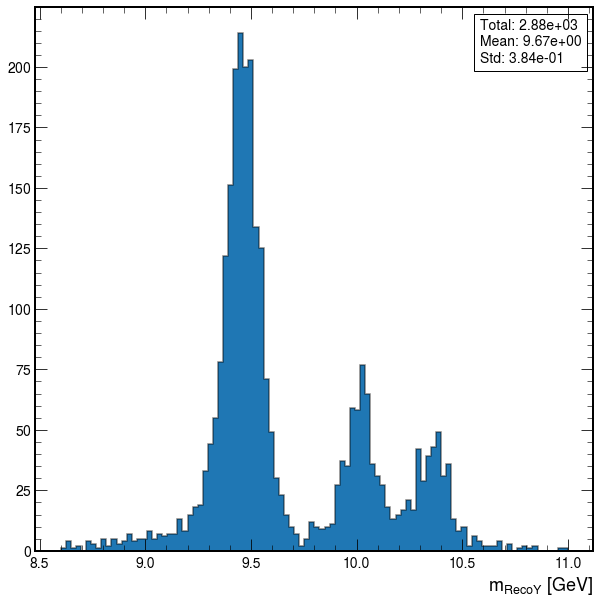

In [16]:
fig, ax = plt.subplots()
create_plot1d(output['Reco_Upsilon']['mass'], ax=ax, log=False)
fig.savefig('test.png')
#create_plot1d(output['Reco_Dstar']['deltam'], ax=ax)

In [13]:
# Evt Display

data = {"test": files[:80]}

orig_stdout = sys.stdout
f = open('out.txt', 'w')
sys.stdout = f

tstart = time.time()

output = processor.run_uproot_job(
                                data, treename='Events',
                                processor_instance=MCProcessor(evt_display=True),
                                executor=processor.iterative_executor,
                                executor_args={"schema": BaseSchema, 'workers': 8, 'skipbadfiles': True},
                                chunksize=360000,
                                )

sys.stdout = orig_stdout
f.close()
print(f"Process finished in: {time.time() - tstart:.2f} s")

Processing: 100%|██████████| 80/80 [09:47<00:00,  7.35s/chunk]

Process finished in: 587.88 s


In [4]:
import uproot

ak.behavior.update(candidate.behavior)
f = uproot.open('Jpsi_Dstar_test_13TeV.root')
#f = uproot.open('/afs/cern.ch/work/k/kmotaama/public/analysis/DESY/nanoAODplus/CMSSW_10_6_20/src/NanoAOD/NanoAnalyzer/UpsilonToMuMuDstarToD0pi.root')
events = f['Events'].arrays()

In [14]:
sys.stdout = orig_stdout
f.close()

(-2.0, 20.0)

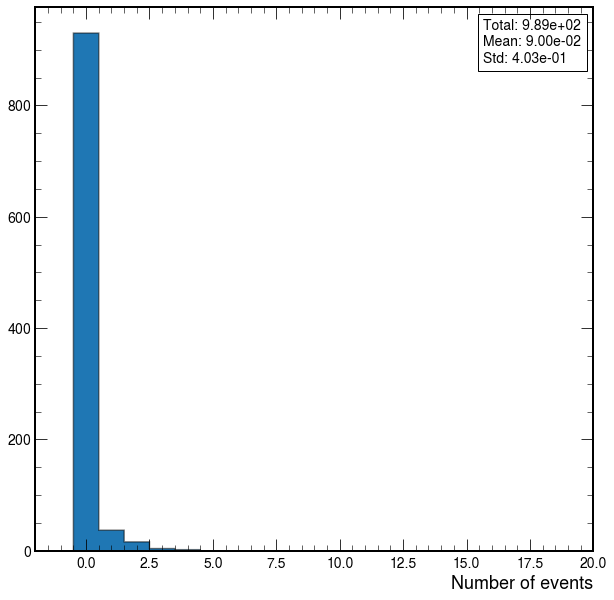

In [25]:
fig, ax = plt.subplots()
create_plot1d(output['cutflow'][:,19])
ax.set_xlim(-2,20)

In [20]:
import pandas as pd

dataset = 'Trigger'

df = pd.read_json("cutflow_{dataset}.json")
df

,cutflow_cand,cutflow_evt,FOM,n_bkg,ratio_evt
No cuts,289121,9957,18.845115,279164,0.815079
Dimu charge = 0,250242,9831,20.050284,240411,0.804764
8.5 < Dimu mass < 11.5,237064,9748,20.445631,227316,0.797970
Muon pt > 1 GeV,233338,9732,20.580711,223606,0.796660
Muon |eta| < 2.5,232924,9732,20.599790,223192,0.796660
Muon Soft Id,214859,9434,20.814655,205425,0.772266
D* tracks are not muons,204408,9377,21.233036,195031,0.767600
K and pi charge = 0,204408,9377,21.233036,195031,0.767600
D* |eta| < 2.5,193777,9340,21.748177,184437,0.764571
D0 from D* |eta| < 2.5,193292,9339,21.774437,183953,0.764489


In [29]:
df['ratio_evt']

No cuts                                      0.815079
Dimu charge = 0                              0.804764
8.5 < Dimu mass < 11.5                       0.797970
Muon pt > 1 GeV                              0.796660
Muon |eta| < 2.5                             0.796660
Muon Soft Id                                 0.772266
D* tracks are not muons                      0.767600
K and pi charge = 0                          0.767600
D* |eta| < 2.5                               0.764571
D0 from D* |eta| < 2.5                       0.764489
D* pt > 2 GeV                                0.754257
D* D0 tracks reduced chi2 < 2.5              0.744597
D* D0 tracks hits >4 in tracker >1 pix       0.729126
D* D0 tracks dxy < 0.1                       0.727816
D* D0 tracks dz < 1                          0.727816
D* pi slow track reduced chi2 < 3            0.725196
D* pi slow # hits in the tracker > 2         0.725196
D0 of D* |mass - D0_PDG_mass| < 0.028        0.640717
D0 of D* cossine of pointing

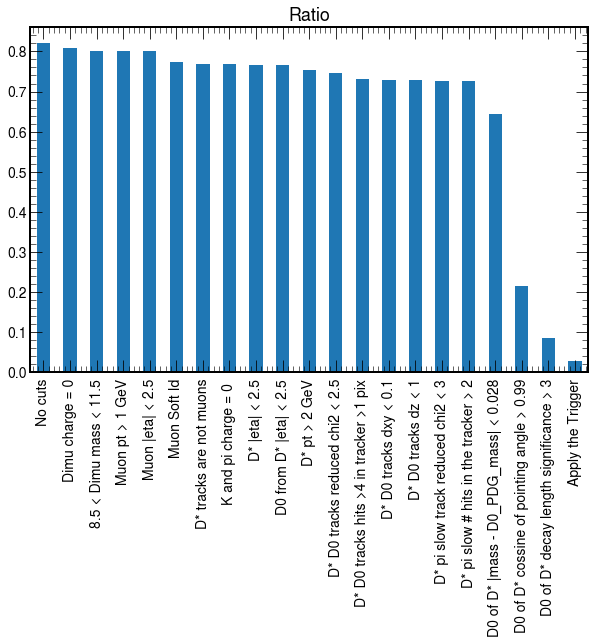

In [18]:
fig, ax = plt.subplots()
df['ratio_evt'].plot.bar(ax=ax)
ax.set_title('Ratio')
#ax.set_yscale('log')
fig.subplots_adjust(bottom=0.4)
fig.savefig('test.png')

,No cuts,Dimu charge = 0,8.5 < Dimu mass < 11.5,Muon pt > 1 GeV,Muon |eta| < 2.5,Muon Soft Id,D* tracks are not muons,K and pi charge = 0,D* |eta| < 2.5,D0 from D* |eta| < 2.5,...,D* D0 tracks reduced chi2 < 2.5,D* D0 tracks hits >4 in tracker >1 pix,D* D0 tracks dxy < 0.1,D* D0 tracks dz < 1,D* pi slow track reduced chi2 < 3,D* pi slow # hits in the tracker > 2,D0 of D* |mass - D0_PDG_mass| < 0.028,D0 of D* cossine of pointing angle > 0.99,D0 of D* decay length significance > 3,Apply the Trigger
cutflow_cand,289121.000000,250242.000000,237064.000000,233338.000000,232924.00000,214859.000000,204408.000000,204408.000000,193777.000000,193292.000000,...,141593.000000,119721.000000,118511.000000,118511.000000,114371.000000,114371.000000,50125.000000,4863.000000,1693.000000,523.000000
cutflow_evt,9957.000000,9831.000000,9748.000000,9732.000000,9732.00000,9434.000000,9377.000000,9377.000000,9340.000000,9339.000000,...,9096.000000,8907.000000,8891.000000,8891.000000,8859.000000,8859.000000,7827.000000,2668.000000,1110.000000,344.000000
FOM,18.845115,20.050284,20.445631,20.580711,20.59979,20.814655,21.233036,21.233036,21.748177,21.774437,...,24.988917,26.756798,26.853798,26.853798,27.273054,27.273054,38.057076,56.946700,45.971503,25.711767
n_bkg,279164.000000,240411.000000,227316.000000,223606.000000,223192.00000,205425.000000,195031.000000,195031.000000,184437.000000,183953.000000,...,132497.000000,110814.000000,109620.000000,109620.000000,105512.000000,105512.000000,42298.000000,2195.000000,583.000000,179.000000
ratio_evt,0.815079,0.804764,0.797970,0.796660,0.79666,0.772266,0.767600,0.767600,0.764571,0.764489,...,0.744597,0.729126,0.727816,0.727816,0.725196,0.725196,0.640717,0.218402,0.090864,0.028160


{'n_gen_upsilon': Hist(Regular(1000, -0.5, 999.5, name='n_gen_upsilon', label='Number of Gen Upsilon'), storage=Int64()) # Sum: 989.0,
 'n_gen_associated': Hist(Regular(1000, -0.5, 999.5, name='n_gen_associated', label='Number of Gen Associated'), storage=Int64()) # Sum: 989.0,
 'n_reco_dstar': Hist(Regular(1000, -0.5, 999.5, name='n_reco_dstar', label='Number of Reco Dstar'), storage=Int64()) # Sum: 989.0,
 'n_reco_associated': Hist(Regular(1000, -0.5, 999.5, name='n_reco_associated', label='Number of Reco Associated'), storage=Int64()) # Sum: 989.0,
 'n_reco_upsilon': Hist(Regular(1000, -0.5, 999.5, name='n_reco_upsilon', label='Number of Reco Upsilon'), storage=Int64()) # Sum: 989.0,
 'n_evt': Hist(Regular(1000, -0.5, 999.5, name='n_evt', label='Number of Events'), storage=Int64()) # Sum: 80.0,
 'n_gen_dstar': Hist(Regular(1000, -0.5, 999.5, name='n_gen_dstar', label='Number of Gen Dstar'), storage=Int64()) # Sum: 989.0}

In [16]:
GenPart = ak.zip({**get_vars_dict(events, gen_part_cols)}, with_name="PtEtaPhiMCandidate")

Muon = ak.zip({**get_vars_dict(events, muon_cols)}, with_name="PtEtaPhiMCandidate")
Muon = Muon[Muon.simIdx > -1]

GenPart_Muon = GenPart[Muon.simIdx]

for i0 in range(len(GenPart_Muon)):
    print(f"Event: {i0}")
    for i1 in range(len(GenPart_Muon[i0])):
        print(f"Gen : ({GenPart_Muon[i0][i1].pt:.2f}, {GenPart_Muon[i0][i1].eta:.2f}, {GenPart_Muon[i0][i1].phi:.2f})")
        print(f"Reco: ({Muon[i0][i1].pt:.2f}, {Muon[i0][i1].eta:.2f}, {Muon[i0][i1].phi:.2f})")

Event: 0
Gen : (62.35, 2.00, -2.46)
Reco: (60.47, 2.00, -2.46)
Gen : (9.01, 1.87, -2.44)
Reco: (8.89, 1.87, -2.44)
Event: 1
Gen : (47.58, 0.55, 2.03)
Reco: (47.70, 0.55, 2.03)
Gen : (30.42, 0.49, 2.08)
Reco: (31.14, 0.49, 2.08)
Event: 2
Gen : (45.95, -1.72, -1.35)
Reco: (45.48, -1.72, -1.35)
Gen : (11.63, -1.85, -1.36)
Reco: (11.62, -1.85, -1.36)
Event: 3
Gen : (52.66, -0.50, 1.32)
Reco: (51.94, -0.50, 1.32)
Gen : (33.42, -0.52, 1.39)
Reco: (33.64, -0.52, 1.39)
Event: 4
Gen : (65.29, 0.68, 0.82)
Reco: (65.02, 0.68, 0.82)
Event: 5
Gen : (39.01, 2.35, -0.81)
Reco: (38.07, 2.35, -0.81)
Gen : (16.37, 2.23, -0.82)
Reco: (16.15, 2.23, -0.82)
Event: 6
Gen : (35.87, 1.02, 0.88)
Reco: (35.02, 1.02, 0.88)
Gen : (13.76, 0.88, 0.87)
Reco: (13.66, 0.88, 0.87)
Event: 7
Gen : (49.10, -0.59, -0.89)
Reco: (49.31, -0.59, -0.89)
Event: 8
Gen : (53.32, 1.04, -1.32)
Reco: (53.82, 1.04, -1.32)
Gen : (3.31, 1.27, -1.33)
Reco: (3.40, 1.27, -1.33)
Event: 9
Gen : (43.20, -1.30, -0.54)
Reco: (44.95, -1.30, -0.54